In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [4]:
df = pd.read_excel('b30 stats.xlsx')
df.head()

,date,datenormal,date_gap,disp,flags,lat,lon,mask,size,vel_angle,Exported,Area km2,worldview url,Notes,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2012145.0,2012-05-24,0.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Mask Values,NaN
1,2012146.0,2012-05-25,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,#,Surrounding
2,2012147.0,2012-05-26,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,Near Land or no data
3,2012148.0,2012-05-27,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,Sea Ice
4,2012149.0,2012-05-28,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,Open Ocean


In [5]:
df = df[df["Area km2"].isnull() == False]

### Convert iceberg freeboard to thickness

$h_i = \frac{\rho_w}{\rho_w-\rho_i}h_{ice}$

Density of sea water = 1025
Density of ice = 917

In [19]:
thickness = (1025/(1025-917))*45
df['volume'] = df['Area km2'] * thickness / 1000

In [21]:
df.head()

,date,datenormal,date_gap,disp,flags,lat,lon,mask,size,vel_angle,Exported,Area km2,worldview url,Notes,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,volume
93,2012250.0,2012-09-06,1.0,3.597,13.0,-74.659,-107.154,0.0,10.00,0.000,x,3070.7,https://worldview.earthdata.nasa.gov/?p=antarc...,NaN,NaN,NaN,NaN,NaN,1311.444792
98,2012255.0,2012-09-11,1.0,5.876,13.0,-74.578,-106.981,0.0,10.00,0.000,x,1998.3,https://worldview.earthdata.nasa.gov/?p=antarc...,NaN,NaN,NaN,NaN,NaN,853.440625
165,2012324.0,2012-11-19,1.0,2.766,15.0,-73.677,-107.688,1.0,1266.26,0.000,x,1602.2,https://worldview.earthdata.nasa.gov/?p=antarc...,NaN,NaN,NaN,NaN,NaN,684.272917
227,2013020.0,2013-01-20,1.0,4.015,14.0,-73.020,-109.004,1.0,906.89,-0.015,x,1538.6,https://worldview.earthdata.nasa.gov/?p=antarc...,NaN,NaN,NaN,NaN,NaN,657.110417
306,2013099.0,2013-04-09,1.0,6.141,13.0,-72.291,-112.482,0.0,10.00,0.000,x,1520.8,https://worldview.earthdata.nasa.gov/?p=antarc...,NaN,NaN,NaN,NaN,NaN,649.508333


Text(0, 0.5, 'Area ($km^2$)')

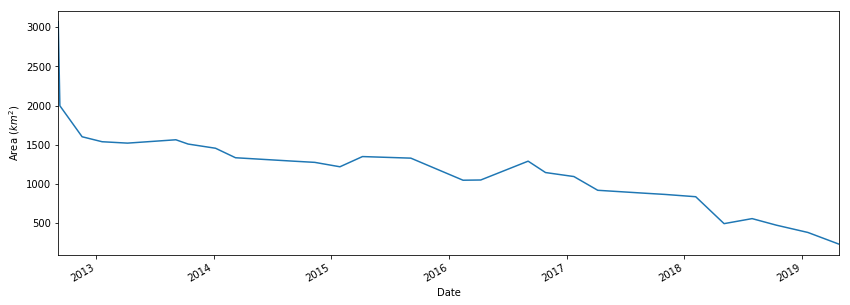

In [10]:
df.plot(x = 'datenormal', y = 'Area km2', figsize=(14,5), legend=None)
plt.xlabel('Date')
plt.ylabel('Area ($km^2$)')

Text(0, 0.5, 'Volume ($km^3$)')

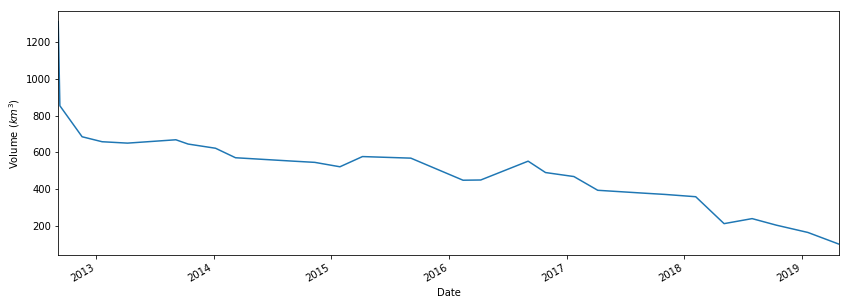

In [23]:
df.plot(x = 'datenormal', y = 'volume', figsize=(14,5), legend=None)
plt.xlabel('Date')
plt.ylabel('Volume ($km^3$)')

In [22]:
maxvol = df['volume'].max()
minvol = df['volume'].min()
maxvol - minvol / 9

1300.6158564814814